In [62]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, GridSearchCV


# generate two class dataset
data = pd.read_csv("total 10476 - 42 variables.csv")
data.tail()

,No,stroke,sex,age,NP,NC,MP,MC,BasoP,BasoC,...,TP,GLB,ALB,DBil,AKP,ALT,GGT,RAST-ALT,AST,I-Bil
10471,10112,0,1,80,53.1,1.73,5.9,0.19,0.4,1,...,71.3,27.9,43.4,9.9,50,17,17,1.12,19,17.4
10472,11993,0,1,80,68.4,4.41,7.3,0.47,0.5,3,...,71.1,28.0,43.1,4.9,74,19,35,1.11,21,8.9
10473,10759,0,1,80,53.4,3.04,7.9,0.45,0.1,1,...,64.1,22.7,41.4,6.7,77,16,15,1.25,20,13.4
10474,7073,0,1,80,54.9,2.25,4.9,0.20,0.7,3,...,66.5,25.4,41.1,4.2,36,34,24,0.62,21,6.0
10475,9661,0,1,80,60.2,4.00,6.4,0.42,0.2,1,...,72.4,30.1,42.3,4.4,69,14,15,1.43,20,11.3


In [63]:
data=data.drop(['No'],axis=1)
data.head()

,stroke,sex,age,NP,NC,MP,MC,BasoP,BasoC,EosP,...,TP,GLB,ALB,DBil,AKP,ALT,GGT,RAST-ALT,AST,I-Bil
0,1,0,41,63.1,3.75,4.8,0.29,0.4,2,1.8,...,69.2,28.1,41.1,2.7,73,36,36,0.58,21,6.1
1,1,0,41,74.4,8.60,6.3,0.61,0.1,1,1.2,...,63.6,25.8,37.8,3.9,104,24,35,0.71,17,8.8
2,1,0,41,59.6,3.10,6.6,0.34,0.6,3,0.4,...,73.2,32.3,40.9,7.2,34,5,12,4.00,20,11.6
3,1,0,41,75.3,10.10,5.7,0.61,0.3,3,1.0,...,69.5,29.8,39.7,2.3,48,12,20,2.08,25,5.3
4,1,0,41,67.1,2.89,8.8,0.38,0.4,2,1.9,...,72.4,29.4,43.0,4.4,117,17,16,0.88,15,8.9


In [64]:
# Split target and features
X = data.drop(['stroke'],axis=1)
X
y = data['stroke']
y = y.astype(int)
y
print(X.shape)
print(y.shape)

(10476, 42)
(10476,)


In [27]:
########## Data visualisation - PCA

In [28]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

In [29]:
from sklearn.preprocessing import StandardScaler

# creat the object
scaler = StandardScaler()

# Calculate the mean and the standard deviation
scaler.fit(X)
X_scaled = scaler.transform(X)

In [30]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

# first one
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8,test_size=0.2, random_state=5)

# second one

#X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.9, test_size=0.1, random_state=5)

print(X_train.shape)
print(X_test.shape)
#print(X_valid.shape)

print(y_train.shape)
print(y_test.shape)
#print(y_valid.shape)

(8380, 42)
(2096, 42)
(8380,)
(2096,)


In [31]:
y_train.value_counts()  # for whole dataset, IS:non-IS = 4999:5477; IS ratio is 4999/10476=47.719%

## for train set including 80% of the dataset (8380), IS:nonIS = 3962:4418, 
## IS ratio for training set is 3962/8380 = 47.279%

0    4418
1    3962
Name: stroke, dtype: int64

In [32]:
y_test.value_counts()

## IS ratio for testing set is 1037/2096 = 49.475%

0    1059
1    1037
Name: stroke, dtype: int64

In [ ]:
#############################################################################################################

In [33]:
pca_30 = PCA(n_components=6, random_state = 24)
pca_30.fit(X_scaled)
X_pca_30 = pca_30.transform(X_scaled)

In [34]:
print("Variance explained by all 6 principal components = ",
     sum(pca_30.explained_variance_ratio_ * 100))

Variance explained by all 6 principal components =  46.28691080835626


In [35]:
pca_30.explained_variance_ratio_ * 100

array([11.3241462 ,  9.43576204,  8.05038473,  6.48284023,  5.71307712,
        5.28070049])

In [36]:
np.cumsum(pca_30.explained_variance_ratio_ * 100)  # Variance explained by the first 3 principal components = 46.29% 

array([11.3241462 , 20.75990824, 28.81029297, 35.2931332 , 41.00621032,
       46.28691081])

In [37]:
X_reduced = PCA(n_components=3).fit_transform(X)

In [38]:
plt.style.use('ggplot')

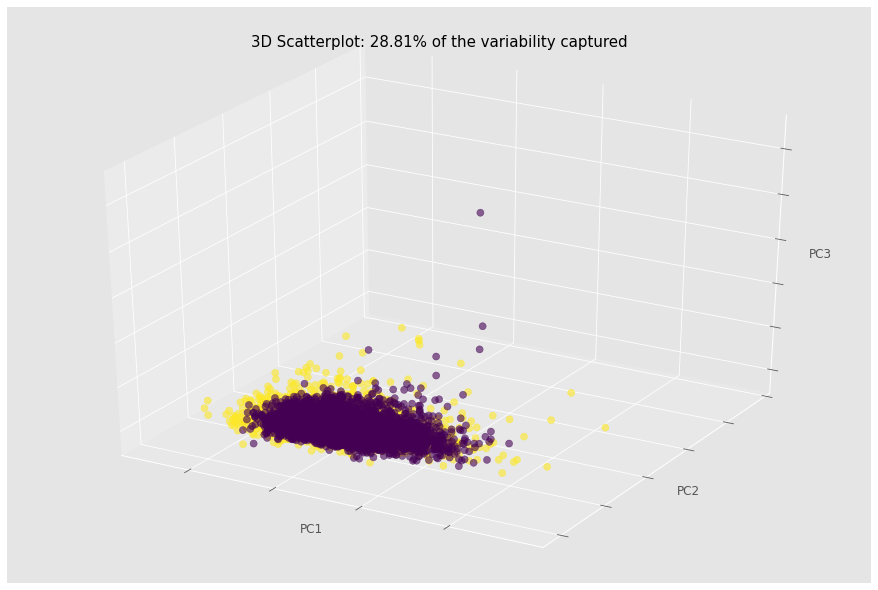

In [39]:
fig = plt.figure(figsize = (12,8))
axes = Axes3D(fig)
axes.set_title('3D Scatterplot: 28.81% of the variability captured', size=15)
axes.set_xlabel('PC1')
axes.set_ylabel('PC2')
axes.set_zlabel('PC3')
axes.w_xaxis.set_ticklabels(())
axes.w_yaxis.set_ticklabels(())
axes.w_zaxis.set_ticklabels(())
axes.scatter(X_reduced[:,0],X_reduced[:,1],X_reduced[:,2], c = y, s=50, alpha=0.6)

In [40]:
from mpl_toolkits import mplot3d

Text(0.5, 0, 'Third principal component')

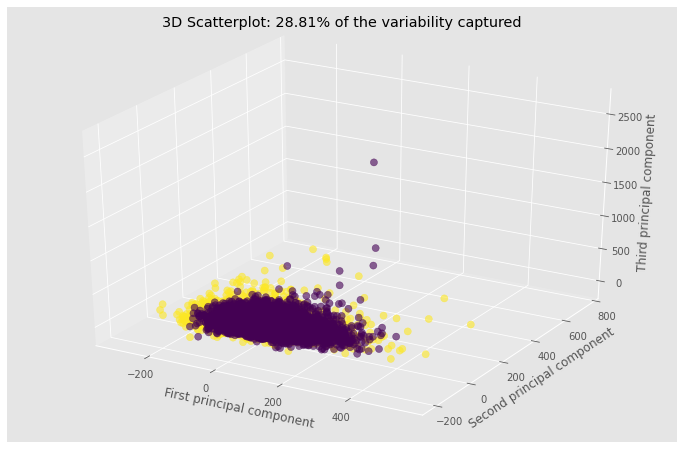

In [41]:
fig2 = plt.figure(figsize = (12,8))
ax2 = plt.axes(projection='3d')
sctt = ax2.scatter3D(X_reduced[:,0],X_reduced[:,1],X_reduced[:,2], c = y, s=50, alpha=0.6)

plt.title("3D Scatterplot: 28.81% of the variability captured", pad=15)
ax2.set_xlabel('First principal component')
ax2.set_ylabel('Second principal component')
ax2.set_zlabel('Third principal component')

In [42]:
#########################################################################